In [35]:
!pip install plotly
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/94/41/143e80c1f48f7e826380f382dff6caf93a698c77bf2e9e38290bbbfbfe42/xgboost-1.7.6-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.7 MB/s eta 0:00:00a 0:00:01


In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix


In [82]:
# Reading Data
df =pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.describe().T.style.background_gradient(cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


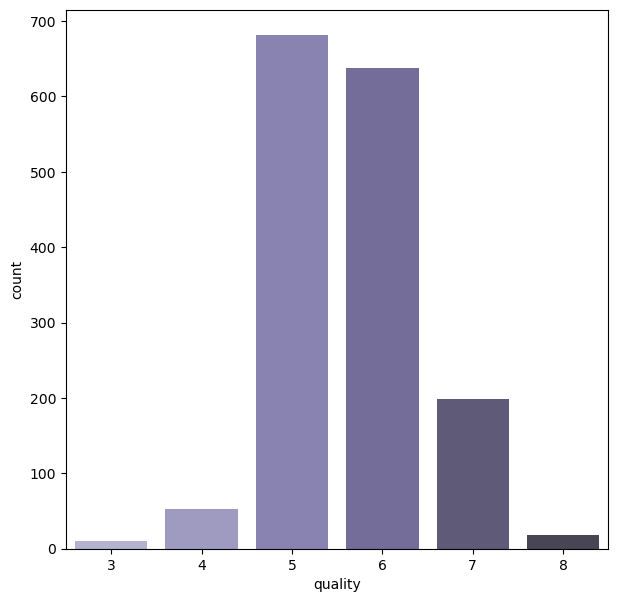

In [48]:
# Exploratory data analysis
plt.figure(figsize=(7,7))
sns.countplot(x='quality',data=df,palette='Purples_d')
plt.show()

In [49]:
# Correlation of data
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


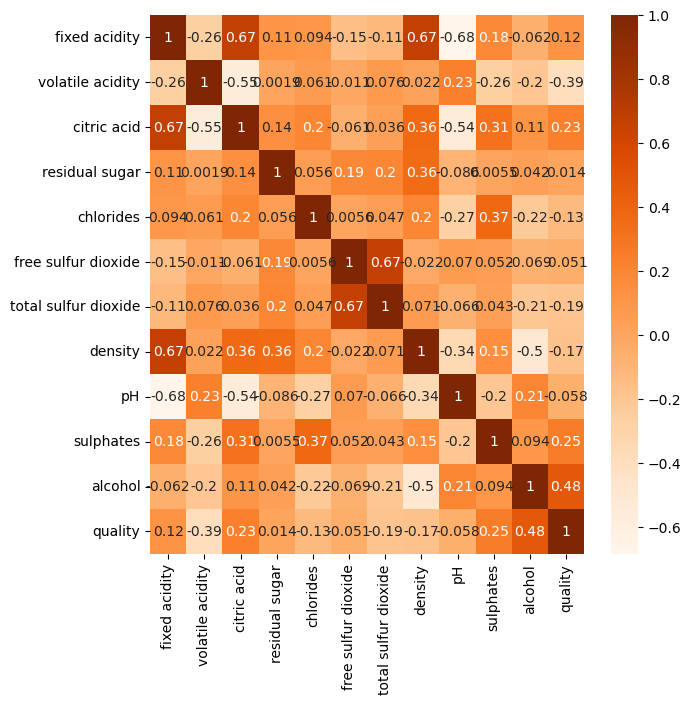

In [51]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='Oranges')
plt.show()

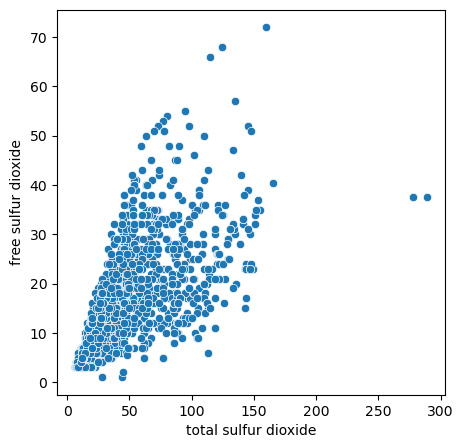

In [54]:
# Plot between total sulphur dioxide and free sulphur dioxide
plt.figure(figsize=(5,5))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

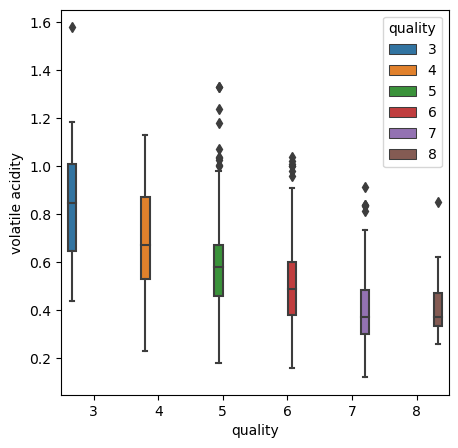

In [63]:
# Quality changes with volatile acidity
plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

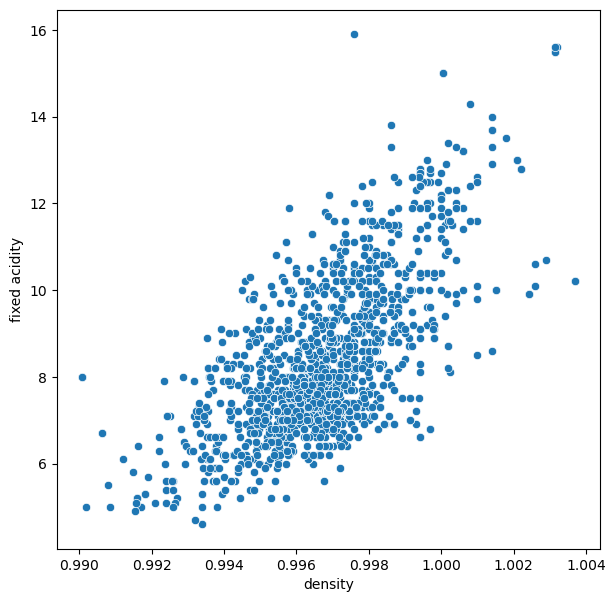

In [65]:
# Density of wine varies with fixed acidity
plt.figure(figsize=(7,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

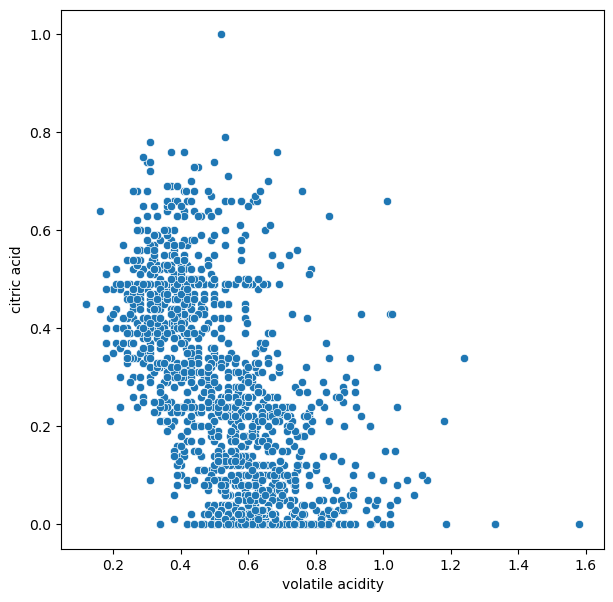

In [66]:
# Volatile acidity changes w.r.t citric acid
plt.figure(figsize=(7,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

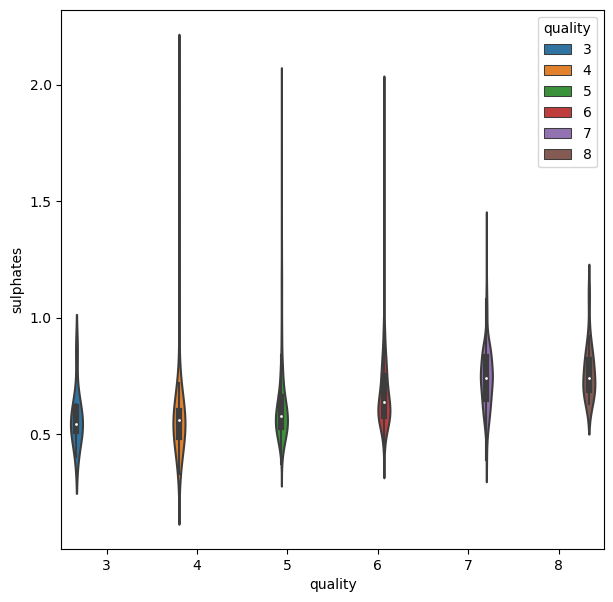

In [68]:
#Quality of wine changes w.r.t sulphates in it
plt.figure(figsize=(7,7))
sns.violinplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

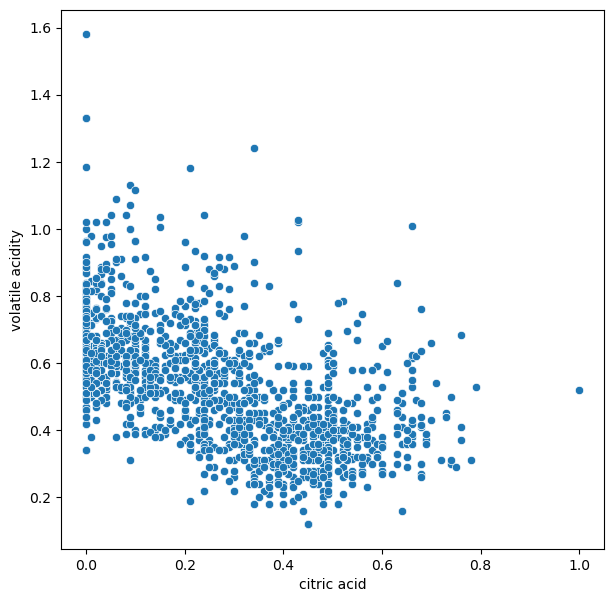

In [69]:
# Citric acid and volatile acidity
plt.figure(figsize=(7,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [70]:
# Data Preprocessing
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

In [71]:
#Splitting dataset - 20% testing and 80% training
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

In [72]:
#Preparing for modelling
model_comp={}

### 1. Logistic Regression

In [74]:
logr=LogisticRegression()
logr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.625
0.5931778739355794
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.77      0.70       135
           6       0.62      0.65      0.64       142
           7       0.33      0.11      0.17        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.58      0.62      0.59       320



### 2. Decision Tree

In [75]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.671875
0.6740538113678846
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.27      0.26        11
           5       0.74      0.72      0.73       135
           6       0.71      0.67      0.69       142
           7       0.53      0.74      0.62        27
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.37      0.40      0.38       320
weighted avg       0.68      0.67      0.67       320



### 3. Random Forest

In [76]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.728125
0.7121625007257162
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.81      0.79       135
           6       0.73      0.75      0.74       142
           7       0.53      0.59      0.56        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.70      0.73      0.71       320



### 4. KNN 

In [77]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.625
0.6101330372686371
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       135
           6       0.63      0.62      0.63       142
           7       0.46      0.44      0.45        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.60      0.62      0.61       320



### 5. SVC

In [78]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.65
0.6024744814931203
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.81      0.73       135
           6       0.63      0.70      0.66       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.22      0.25      0.23       320
weighted avg       0.56      0.65      0.60       320



### Comparing Models

In [80]:
# Checking accuracy and f1 scores of all models
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Purples')

,Accuracy,F1_score
logistic regression,0.625000,0.593178
svc,0.650000,0.602474
KNN,0.625000,0.610133
decision tree,0.671875,0.674054
Random forest,0.728125,0.712163


#### Therefore, Random Forest has the highest accuracy of 72%